In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

In [2]:
def sampling(lon_min=-142, lon_max=-53, lat_min=41, lat_max=75, n_points=500):    
    lat = np.array([])
    lon = np.array([])
    pts = 0
    
    bm = Basemap(projection='cyl', resolution='l',
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max)

    while pts < n_points:
        x = np.random.uniform(lat_min,lat_max,1)
        y = np.random.uniform(lon_max,lon_min,1)
        
        if bm.is_land(y, x):
            lat = np.hstack((lat, x)) 
            lon = np.hstack((lon, y)) 
            pts = pts + 1
        
    return (lat , lon)

In [3]:
lon_min=-141.5
lon_max=-54
lat_min=42
lat_max=72

lat , lon = sampling(lon_min, lon_max, lat_min, lat_max)

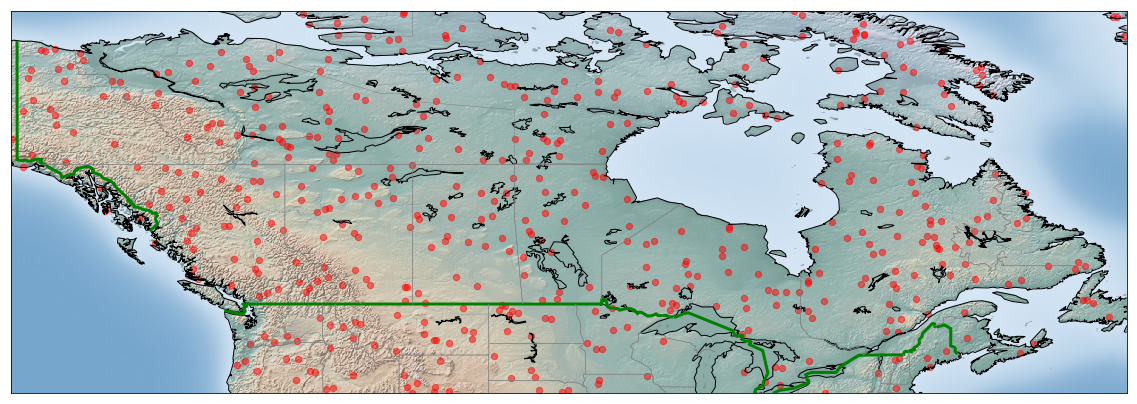

In [4]:
fig = plt.figure(figsize=(20, 30))
bm = Basemap(projection='cyl', resolution='l',
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max)
bm.shadedrelief()
bm.drawcoastlines(color='black')
bm.drawcountries(color='green',linewidth=3)
bm.drawstates(color='gray')

bm.scatter(lon, lat, latlon=True, s=40, c='red', alpha=0.5)
#           c=np.log10(1)

plt.show()